In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

import tensorflow as tf
import tensorflow.keras as keras


from tensorflow.keras import backend as K
from tensorflow.keras import metrics, regularizers, optimizers
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential


import matplotlib as mpl
import matplotlib.pyplot as plt

import random as rn
import scipy as sp

In [2]:
data = pd.read_csv("krkopt.csv")

In [3]:
data

,WK_file,WK_rank,WR_file,WR_rank,BK_file,BK_rank,result
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw
...,...,...,...,...,...,...,...
28051,b,1,g,7,e,5,sixteen
28052,b,1,g,7,e,6,sixteen
28053,b,1,g,7,e,7,sixteen
28054,b,1,g,7,f,5,sixteen


In [4]:
#exploratory analysis
data.shape


(28056, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   WK_file  28056 non-null  object
 1   WK_rank  28056 non-null  int64 
 2   WR_file  28056 non-null  object
 3   WR_rank  28056 non-null  int64 
 4   BK_file  28056 non-null  object
 5   BK_rank  28056 non-null  int64 
 6   result   28056 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [6]:
#for output layer of NN
data["result"].unique()

array(['draw', 'zero', 'one', 'two', 'three', 'four', 'five', 'six',
       'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen',
       'fourteen', 'fifteen', 'sixteen'], dtype=object)

In [7]:
#These numbers tell us about the ranks of the pieces, basically how far up on the board they are.
#the reason 8 is max, is because the board is only 8 squares long.
data.describe()

,WK_rank,WR_rank,BK_rank
count,28056.000000,28056.000000,28056.000000
mean,1.854006,4.512404,4.451811
std,0.926414,2.282723,2.248387
min,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000
50%,2.000000,5.000000,4.000000
75%,2.000000,6.000000,6.000000
max,4.000000,8.000000,8.000000


In [8]:
#check for missing data
data.isnull().sum()

WK_file    0
WK_rank    0
WR_file    0
WR_rank    0
BK_file    0
BK_rank    0
result     0
dtype: int64

<AxesSubplot:>

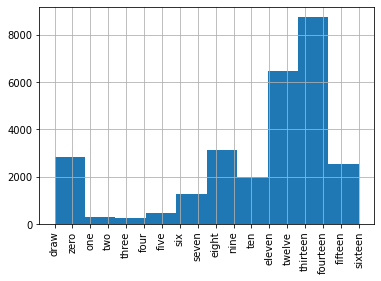

In [9]:
#distribution of result column
plt.xticks(rotation=90)
data["result"].hist()

In [10]:
#pre processing
#Labelencoding file as rank already is a number from 1-8
white_king = LabelEncoder()
white_rook = LabelEncoder()
black_king = LabelEncoder()
result = LabelEncoder()

In [11]:
data["WK_file"] = white_king.fit_transform(data["WK_file"])
data["WR_file"] = white_rook.fit_transform(data["WR_file"])
data["BK_file"] = black_king.fit_transform(data["BK_file"])
data["result"] = result.fit_transform(data["result"])

In [12]:
y = data["result"]
X = data.iloc[:,:-1].values

In [13]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
28051    11
28052    11
28053    11
28054    11
28055    11
Name: result, Length: 28056, dtype: int32


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 0, test_size=0.2)

In [15]:
#finding optimal number of neigbors

accuracy = []
i = 1
num_neighbors = 16

for i in range(num_neighbors):
    knn_model = KNeighborsClassifier(n_neighbors = i+1)
    knn_model.fit(X_train, y_train)
    accuracy.append(knn_model.score(X_test, y_test))
    print(i)
print(np.max(np.array(accuracy)))
print("optimal number of niegbors:", np.array(accuracy).argmax()+1)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
0.7608695652173914
optimal number of niegbors: 7


In [16]:
knn_model = KNeighborsClassifier(n_neighbors = 7)
knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)

0.7608695652173914

In [17]:
print(accuracy)

[0.5231646471846044, 0.5352815395580898, 0.6231290092658589, 0.6885245901639344, 0.7277263007840342, 0.7524946543121882, 0.7608695652173914, 0.7585531004989309, 0.7446543121881682, 0.7303991446899502, 0.7204205274411974, 0.699928724162509, 0.6926229508196722, 0.6819315751960086, 0.6785459729151817, 0.670527441197434]


In [18]:
#scaling the data after performing KNN, as KNN has performed better without the scaling
X = StandardScaler().fit_transform(X,y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 0, test_size=0.2)

In [20]:
X_train

array([[ 0.95073919,  2.31649321, -1.54293208, -1.1006366 ,  0.85429472,
         0.68859012],
       [-0.11655989, -0.92185718, -1.10778429, -0.2244744 ,  0.85429472,
         1.57813263],
       [ 0.95073919,  1.23704308, -1.10778429,  0.21360669, -0.01141693,
         0.24381886],
       ...,
       [ 0.95073919,  1.23704308,  0.19765909, -0.6625555 , -0.87712857,
         1.57813263],
       [-1.18385898,  0.15759295,  1.06795468, -0.2244744 ,  0.85429472,
        -1.53526617],
       [ 0.95073919,  2.31649321,  1.06795468, -0.6625555 ,  1.28715054,
        -0.2009524 ]])

In [21]:
SVM_model = SVC(probability=True)

parameters = parameters = {'kernel':('linear', 'rbf', 'poly'), 'C': list(range(1,6)),
          'coef0': list(range(1,6)), "degree": list(range(1,6))}


grid = RandomizedSearchCV(SVM_model, parameters, n_jobs = -1, cv = 2, n_iter=100)
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)
grid.score(X_test, y_test)
y_score = grid.decision_function(X_test)

RandomizedSearchCV(cv=2, estimator=SVC(probability=True), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5],
                                        'coef0': [1, 2, 3, 4, 5],
                                        'degree': [1, 2, 3, 4, 5],
                                        'kernel': ('linear', 'rbf', 'poly')})
0.6372304402067368
SVC(C=4, coef0=4, degree=5, kernel='poly', probability=True)


In [22]:
#Preparing y for NN
y_train_NN = to_categorical(y_train, 18)
y_test_NN = to_categorical(y_test, 18)

seed = 100

In [23]:
y_test_NN.shape

(5612, 18)

In [24]:
print(y_test_NN)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [25]:
model = Sequential()
model.add(Dense(units = 6, activation = "sigmoid"))
model.add(Dense(units = 96, activation = "sigmoid"))
model.add(Dense(units = 96, activation = "sigmoid"))
model.add(Dense(units = 18, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate = 0.01)

model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])

In [26]:
history = model.fit(X_train, y_train_NN, epochs = 300, verbose = 0, validation_split = 0.2)

In [27]:
acc = model.evaluate(X_train, y_train_NN)
acc

702/702 [==============================] - 0s 629us/step - loss: 0.4769 - accuracy: 0.8344


[0.47691333293914795, 0.8343878388404846]

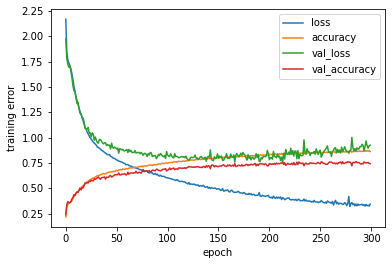

In [28]:
plt.figure("Model training")
plt.ylabel("training error")
plt.xlabel("epoch")
for i in history.history.keys():
    plt.plot(history.history[i], label = i)
plt.legend(loc = "best")

In [29]:
acc_test = model.evaluate(X_test, y_test_NN)
acc_test

176/176 [==============================] - 0s 627us/step - loss: 0.9257 - accuracy: 0.7434


[0.9256743788719177, 0.7434070110321045]

In [30]:
tree = DecisionTreeClassifier()

parameters = {"max_depth": [3, 6, 10, 15, 20], "min_samples_leaf": [3, 5, 7, 9, 11], "criterion": ["gini", "entropy"]}

grid = GridSearchCV(tree, parameters, n_jobs = -1, cv = 5)
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)
grid.score(X_test, y_test)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 10, 15, 20],
                         'min_samples_leaf': [3, 5, 7, 9, 11]})
0.7389062449743461
DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=3)


0.7473271560940841

In [31]:
for model in [knn_model, model, tree, SVM_model]:
    model._estimator_type = "classifier"

In [32]:
ensemble = VotingClassifier(estimators=[("KNeighborsClassifier", knn_model), ("Sequential", model), ("DecisionTreeClassifier", tree), ("SVC", SVM_model)], voting='soft')

In [33]:
ensemble.fit(X_train, y_train)
ensemble.score(X_test, y_test)

0.8282252316464719

In [34]:
print(classification_report(y_test, ensemble.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       548
           1       0.85      0.84      0.85       279
           2       0.85      0.80      0.83       578
           3       0.78      0.85      0.81       446
           4       0.81      0.84      0.82        87
           5       0.76      0.78      0.77        40
           6       0.81      0.89      0.85       891
           7       0.87      0.78      0.82       358
           8       0.89      0.73      0.80        11
           9       0.83      0.65      0.73       140
          10       0.77      0.82      0.79       117
          11       0.87      0.52      0.65        89
          12       0.81      0.78      0.80       392
          13       0.84      0.83      0.84       838
          14       0.50      0.08      0.13        13
          15       0.85      0.79      0.82       738
          16       0.79      1.00      0.88        42
          17       0.80    

In [35]:
confusion_matrix(y_test, ensemble.predict(X_test))

array([[520,   1,   1,   9,   0,   0,   7,   0,   0,   2,   1,   0,   1,
          2,   0,   2,   2,   0],
       [  6, 235,   1,   0,   4,   0,   2,  18,   1,   8,   0,   0,   2,
          0,   0,   2,   0,   0],
       [ 14,   1, 465,   2,   0,   1,  11,   3,   0,   1,   1,   0,  24,
         12,   0,  43,   0,   0],
       [  5,   0,   0, 381,   0,   0,  51,   0,   0,   0,   0,   6,   0,
          2,   0,   1,   0,   0],
       [  2,   2,   0,   0,  73,   1,   0,   0,   0,   1,   8,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   3,  31,   0,   0,   0,   0,   3,   0,   0,
          1,   1,   1,   0,   0],
       [  7,   0,   3,  42,   0,   0, 791,   0,   0,   1,   0,   0,   1,
         43,   0,   3,   0,   0],
       [ 14,  18,  12,   0,   0,   1,   1, 280,   0,   1,   0,   0,  23,
          4,   0,   4,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   8,   0,   1,   0,   0,
          0,   0,   0,   0,   1],
       [  5,  11,   0,   0,   1,   2,